<a href="https://colab.research.google.com/github/nhatanh81096/cs480student/blob/main/01/Anh_Vo_CS480_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

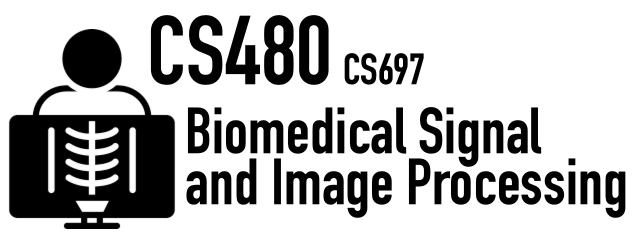
# Assignment 1


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from scipy.misc import electrocardiogram # scipy is a python scientific computing library
ecg = electrocardiogram() # let's load the scipy ECG dataset

In [4]:
SAMPLING_RATE = 360 # this data was sampled with 360 Hz

**Task 1:** Plot the data in the range from 9 to 11 seconds! [30 Points]

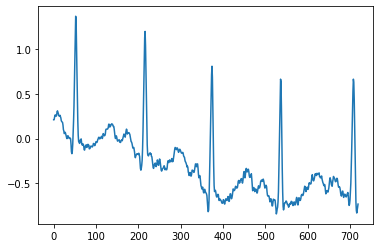

In [5]:
# TODO your plotting code goes here
# please take the sampling rate into account to only plot the range
# between 9 and 11 seconds
plt.plot(ecg[9*SAMPLING_RATE:11*SAMPLING_RATE])

**Task 2:** Use Neurokit to detect the R spikes! [30 Points]

In [6]:
# now can you see the P Q R S T waves? it's actually a pretty good signal despite
# the shift in the baseline

In [7]:
# we now need to install the neurokit2 library
!pip install neurokit2
import neurokit2 as nk

     |████████████████████████████████| 993kB 5.2MB/s 


In [8]:
# we can use neurokit's function to detect the R spikes
_, rpeaks = nk.ecg_peaks(ecg, sampling_rate=SAMPLING_RATE)

In [9]:
# look at rpeaks - the numbers indicate the samples that are R spikes
print(rpeaks['ECG_R_Peaks'][0:10]) # here only the first ten

[ 125  343  552  748  944 1130 1317 1501 1691 1880]


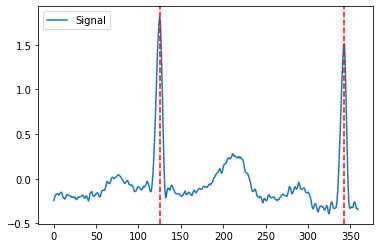

In [10]:
# you can also plot the first two detected R spikes
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][0:2], ecg[0:SAMPLING_RATE])

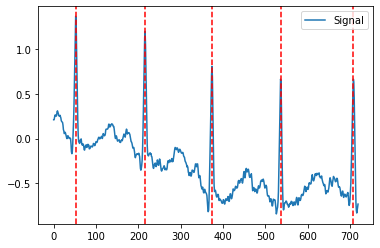

In [11]:
# TODO Can you write code to plot the R spikes between 9 and 11 seconds?
# Hint: one solution could be to just detect peaks in the range you specified for Task 1
# Hint 2: you might need to extend the range by +- 1 second to see the five peaks from Task 1

# Detect the R spikes in the sample (the range is widen to get the api detects all the five peaks from Task 1)
_, rpeaks_sample = nk.ecg_peaks(ecg[8*SAMPLING_RATE:12*SAMPLING_RATE], sampling_rate=SAMPLING_RATE)

# Plot the R spikes of only between 9 and 11 seconds (-360 to shift the value to the left to the corresponding time)
plot_sample = nk.events_plot(rpeaks_sample['ECG_R_Peaks'][1:6]-360, ecg[9*SAMPLING_RATE:11*SAMPLING_RATE])

**Task 3:** Detect Heartrate. [15 Points]

In [12]:
# TODO Does the patient have a regular heart rate? If yes, which one? (estimate is fine)
# Hint: you can use the rpeaks for that 

In [13]:
for i in range(5):
  _, rpeaks_1_min = nk.ecg_peaks(ecg[i*60*SAMPLING_RATE:(i+1)*60*SAMPLING_RATE], sampling_rate=SAMPLING_RATE)
  print(f"Number of R peaks in minute {i+1}: {len(rpeaks_1_min['ECG_R_Peaks'])}")

Number of R peaks in minute 1: 110
Number of R peaks in minute 2: 98
Number of R peaks in minute 3: 99
Number of R peaks in minute 4: 94
Number of R peaks in minute 5: 99


*   According to the data, it can be seen that there are around 100 R peaks 
*   The heart rate is a little bit high comparing to the normal resting heart rate (60 - 100 bpm)
*   This is probably because the subject is moving around

**Task 4:** Detect P Q S T Peaks. [25 Points]

In [14]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the range of 9 to 11 seconds?
# Hint: Look at the tutorial: https://neurokit2.readthedocs.io/en/latest/examples/ecg_delineate.html#Locate-other-waves-(P,-Q,-S,-T)-and-their-onset-and-offset
# Hint 2: The plot will have blue, orange, green, and red circles :)

# First let try detecting using the 'peaks' method (the range is widen to detect all the peaks in the expected time (9 to 11 seconds))
_, wave_peaks = nk.ecg_delineate(ecg[8*SAMPLING_RATE:12*SAMPLING_RATE], sampling_rate=SAMPLING_RATE)

# We now shift the value to match with the expected range (move left 1 second)
for i in range(len(wave_peaks['ECG_P_Peaks'])):
  wave_peaks['ECG_P_Peaks'][i] -= 360

for i in range(len(wave_peaks['ECG_Q_Peaks'])):
  wave_peaks['ECG_Q_Peaks'][i] -= 360

for i in range(len(wave_peaks['ECG_S_Peaks'])):
  wave_peaks['ECG_S_Peaks'][i] -= 360

for i in range(len(wave_peaks['ECG_T_Peaks'])):
  wave_peaks['ECG_T_Peaks'][i] -= 360

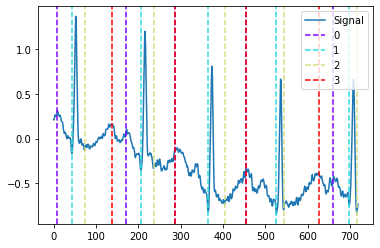

In [15]:
plot_pqst = nk.events_plot([wave_peaks['ECG_P_Peaks'][1:6], wave_peaks['ECG_Q_Peaks'][1:6], wave_peaks['ECG_S_Peaks'][1:6], wave_peaks['ECG_T_Peaks'][1:5]], ecg[9*SAMPLING_RATE:11*SAMPLING_RATE])

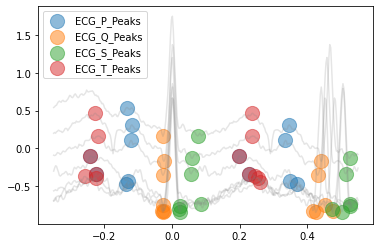

In [16]:
# Now, let try using the "show" argument to show the cirle on the peaks
_, wave_peaks_circles = nk.ecg_delineate(ecg[8*SAMPLING_RATE:12*SAMPLING_RATE], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

In [17]:
# TODO Does the detection work well?


*   When plotting the PQST peaks together with the dash lines, the detection seems to work pretty well. It can show where the peaks are.
*   However, when using the circles, it looks like the detection has mis-detected some points that are not PQST peaks (right part of the graph)
*   The detection is not as perfect as shown in the example in the tutorial which only shows 1 overlapped complex.


**Bonus Task:** Detect P Q S T Peaks for the full signal before and after filtering. [33 Points]

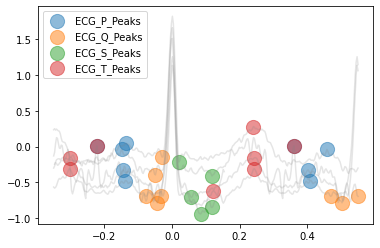

In [18]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Hint: For plotting, 1000 samples / 5 rpeaks gives a nice overview.

_, wave_peaks_full = nk.ecg_delineate(ecg, sampling_rate=SAMPLING_RATE)

_, wave_peaks_1000 = nk.ecg_delineate(ecg[:1000], sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

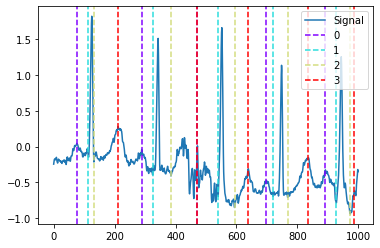

In [19]:
plot_pqst_1000 = nk.events_plot([wave_peaks_1000['ECG_P_Peaks'], wave_peaks_1000['ECG_Q_Peaks'], wave_peaks_1000['ECG_S_Peaks'], wave_peaks_1000['ECG_T_Peaks']], ecg[:1000])

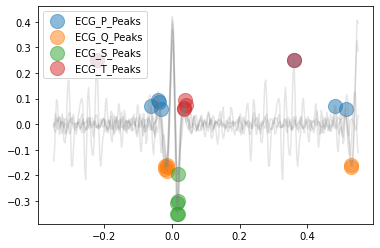

In [24]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

filtered_ecg = nk.signal_filter(ecg[:1000], sampling_rate=SAMPLING_RATE, lowcut=25, highcut=170)
_, wave_peaks_filtered = nk.ecg_delineate(filtered_ecg, sampling_rate=SAMPLING_RATE, show=True, show_type='peaks')

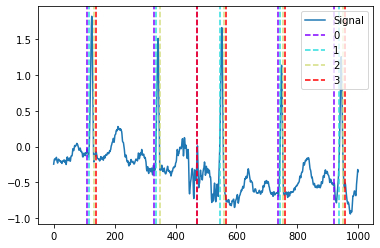

In [25]:
plot_pqst_filtered = nk.events_plot([wave_peaks_filtered['ECG_P_Peaks'], wave_peaks_filtered['ECG_Q_Peaks'], wave_peaks_filtered['ECG_S_Peaks'], wave_peaks_filtered['ECG_T_Peaks']], ecg[:1000])

In [ ]:
# TODO Does the filtering improve the result?

*   Yes, the filter does improve the result







In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#